In [3]:
import pandas as pd
import numpy as np
df = pd.read_excel(r"C:\Users\R.R. Dharun raagav\.vscode\extensions\danielsanmedium.dscodegpt-3.12.3\standalone\final_merged_data.xlsx")
df.head(5)

,TransactionId,UserId,VisitYear,VisitMonth,VisitModeId,AttractionId,Rating,VisitMode,AttractionCityId,AttractionTypeId,...,RegionId_x,CountryId_x,CityId,Continent,Region,ContinentId_y,Country,RegionId_y,CityName,CountryId_y
0,3,70456,2022,10,2,640,5,Couples,1,63,...,21,163,4341.0,Europe,Western Europe,5,United Kingdom,21,Guildford,109.0
1,8,7567,2022,10,4,640,5,Friends,1,63,...,8,48,464.0,America,Northern America,2,Canada,8,Ontario,48.0
2,9,79069,2022,10,3,640,5,Family,1,63,...,9,54,774.0,America,South America,2,Brazil,9,Brazil,51.0
3,10,31019,2022,10,3,640,3,Family,1,63,...,17,135,583.0,Europe,Central Europe,5,Switzerland,17,Zurich,48.0
4,15,43611,2022,10,2,640,3,Couples,1,63,...,21,163,1396.0,Europe,Western Europe,5,United Kingdom,21,Manchester,51.0


In [4]:
columns_to_drop = [
    'TransactionId', 'AttractionId','AttractionAddress',
    'VisitModeId', 'AttractionCityId', 'AttractionTypeId',
    'ContinentId_x', 'RegionId_x', 'CountryId_x',
    'ContinentId_y', 'RegionId_y', 'CountryId_y', 'CityId'
]

df_model = df.drop(columns=columns_to_drop)

In [5]:
df_model.head(5)

,UserId,VisitYear,VisitMonth,Rating,VisitMode,Attraction,Continent,Region,Country,CityName
0,70456,2022,10,5,Couples,Sacred Monkey Forest Sanctuary,Europe,Western Europe,United Kingdom,Guildford
1,7567,2022,10,5,Friends,Sacred Monkey Forest Sanctuary,America,Northern America,Canada,Ontario
2,79069,2022,10,5,Family,Sacred Monkey Forest Sanctuary,America,South America,Brazil,Brazil
3,31019,2022,10,3,Family,Sacred Monkey Forest Sanctuary,Europe,Central Europe,Switzerland,Zurich
4,43611,2022,10,3,Couples,Sacred Monkey Forest Sanctuary,Europe,Western Europe,United Kingdom,Manchester


In [6]:
df_model = df_model.dropna(subset=['CityName'])

In [7]:
df_model.isnull().sum()

UserId        0
VisitYear     0
VisitMonth    0
Rating        0
VisitMode     0
Attraction    0
Continent     0
Region        0
Country       0
CityName      0
dtype: int64

In [8]:
df_model.describe()

,UserId,VisitYear,VisitMonth,Rating
count,52922.000000,52922.000000,52922.000000,52922.000000
mean,45025.888364,2016.351971,6.632497,4.157609
std,25072.959559,1.732955,3.392764,0.970575
min,14.000000,2013.000000,1.000000,1.000000
25%,23470.000000,2015.000000,4.000000,4.000000
50%,45533.500000,2016.000000,7.000000,4.000000
75%,66670.250000,2018.000000,9.000000,5.000000
max,88190.000000,2022.000000,12.000000,5.000000


In [9]:
import pandas as pd

# ----- 1. Season Feature -----
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

df_model['Season'] = df_model['VisitMonth'].apply(get_season)

# ----- 2. IsHolidaySeason -----
df_model['IsHolidaySeason'] = df_model['VisitMonth'].isin([5, 12]).astype(int)

# ----- 3. Region Popularity -----
region_popularity = df_model['Region'].value_counts().to_dict()
df_model['RegionPopularity'] = df_model['Region'].map(region_popularity)

# ----- 4. Attraction Popularity -----
attraction_popularity = df_model['Attraction'].value_counts().to_dict()
df_model['AttractionPopularity'] = df_model['Attraction'].map(attraction_popularity)

# ----- 5. IsTopAttraction -----
top_attractions = df_model['Attraction'].value_counts().nlargest(10).index
df_model['IsTopAttraction'] = df_model['Attraction'].isin(top_attractions).astype(int)

# ----- 6. VisitMode Grouped -----
mode_map = {
    'Solo': 'Alone',
    'Couples': 'Couple',
    'Family': 'Group',
    'Friends': 'Group',
    'Business': 'Business'
    # Add other modes if present
}
df_model['VisitModeGrouped'] = df_model['VisitMode'].map(mode_map).fillna('Other')



In [10]:
# Year Trend
df_model['IsRecent'] = (df_model['VisitYear'] >= 2022).astype(int)

# Month Name / Quarter
df_model['Quarter'] = df_model['VisitMonth'].apply(lambda x: (x-1)//3 + 1)

# IsWeekendMonth (Peak months for tourism)
df_model['IsPeakSeason'] = df_model['VisitMonth'].isin([5, 6, 7, 12]).astype(int)

# User visit frequency
user_visit_counts = df_model['UserId'].value_counts()
df_model['UserVisitCount'] = df_model['UserId'].map(user_visit_counts)

# User Average Rating (if multiple records per user)
user_avg_rating = df_model.groupby('UserId')['Rating'].transform('mean')
df_model['UserAvgRating'] = user_avg_rating


# IsGroupVisitor
df_model['IsGroupVisitor'] = df_model['VisitModeGrouped'].isin(['Group', 'Business']).astype(int)

# Attraction × VisitMode interaction
df_model['AttractionVisitMode'] = df_model['Attraction'] + "_" + df_model['VisitMode']

# Country × Season
df_model['CountrySeason'] = df_model['Country'] + "_" + df_model['Season']


In [11]:
from sklearn.linear_model import LinearRegression
import numpy as np

def calculate_rating_trend(df):
    trends = []

    for user, group in df.groupby("UserId"):
        group = group.sort_values(["VisitYear", "VisitMonth"])
        x = group["VisitYear"] + group["VisitMonth"] / 12
        y = group["Rating"]
        if len(group) > 1:
            model = LinearRegression().fit(x.values.reshape(-1, 1), y.values)
            slope = model.coef_[0]
        else:
            slope = 0  # not enough data to find a trend
        trends.extend([slope] * len(group))

    df["UserRatingTrend"] = trends
    return df

df = calculate_rating_trend(df)


In [12]:
user_pref = df.groupby("UserId")["VisitMode"].agg(lambda x: x.mode()[0]).reset_index()
user_pref.columns = ["UserId", "UserPreferredVisitMode"]
df = df.merge(user_pref, on="UserId", how="left")

attr_std = df.groupby("Attraction")["Rating"].std().reset_index()
attr_std.columns = ["Attraction", "AttractionRatingStd"]
df = df.merge(attr_std, on="Attraction", how="left")

df["CountryAvgRating"] = df.groupby("Country")["Rating"].transform("mean")
df["CityAvgRating"] = df.groupby("CityName")["Rating"].transform("mean")

# Find top 10 most visited attractions
top_attractions = df["Attraction"].value_counts().head(10).index.tolist()

# Create the flag
df["IsTopAttraction"] = df["Attraction"].apply(lambda x: 1 if x in top_attractions else 0)

# Group visit modes by frequency
visit_mode_counts = df["VisitMode"].value_counts()

# Define threshold: keep modes with count >= 10 (you can adjust this)
common_modes = visit_mode_counts[visit_mode_counts >= 10].index

# Create the grouped column
df["VisitModeGrouped"] = df["VisitMode"].apply(lambda x: x if x in common_modes else "Other")


group_top_ratings = df[df["IsTopAttraction"] == 1].groupby("VisitModeGrouped")["Rating"].mean().reset_index()
group_top_ratings.columns = ["VisitModeGrouped", "GroupMode_TopAttractionRating"]
df = df.merge(group_top_ratings, on="VisitModeGrouped", how="left")

df["VisitModeCountry"] = df["VisitMode"] + "_" + df["Country"]
combo_avg = df.groupby("VisitModeCountry")["Rating"].mean().reset_index()
combo_avg.columns = ["VisitModeCountry", "VisitModeCountryRating"]
df = df.merge(combo_avg, on="VisitModeCountry", how="left")

cultural_keywords = ["temple", "museum", "shrine", "cathedral", "monument", "heritage"]

df["IsCulturalAttraction"] = df["Attraction"].str.lower().apply(
    lambda x: int(any(word in x for word in cultural_keywords))
)

df["IsTravelAfterCovid"] = df["VisitYear"].apply(lambda x: 1 if x > 2020 else 0)
df_model['UserAvgRating'] = df_model.groupby('UserId')['Rating'].transform('mean')
df_model['UserAvgRatingDeviation'] = df_model['Rating'] - df_model['UserAvgRating']

df_model['AttractionAvgRating'] = df_model.groupby('Attraction')['Rating'].transform('mean')
df_model['AttractionRatingDeviation'] = df_model['Rating'] - df_model['AttractionAvgRating']



In [13]:
df_model.head(5)

,UserId,VisitYear,VisitMonth,Rating,VisitMode,Attraction,Continent,Region,Country,CityName,...,Quarter,IsPeakSeason,UserVisitCount,UserAvgRating,IsGroupVisitor,AttractionVisitMode,CountrySeason,UserAvgRatingDeviation,AttractionAvgRating,AttractionRatingDeviation
0,70456,2022,10,5,Couples,Sacred Monkey Forest Sanctuary,Europe,Western Europe,United Kingdom,Guildford,...,4,0,1,5.0,0,Sacred Monkey Forest Sanctuary_Couples,United Kingdom_Autumn,0.0,4.26703,0.73297
1,7567,2022,10,5,Friends,Sacred Monkey Forest Sanctuary,America,Northern America,Canada,Ontario,...,4,0,1,5.0,1,Sacred Monkey Forest Sanctuary_Friends,Canada_Autumn,0.0,4.26703,0.73297
2,79069,2022,10,5,Family,Sacred Monkey Forest Sanctuary,America,South America,Brazil,Brazil,...,4,0,1,5.0,1,Sacred Monkey Forest Sanctuary_Family,Brazil_Autumn,0.0,4.26703,0.73297
3,31019,2022,10,3,Family,Sacred Monkey Forest Sanctuary,Europe,Central Europe,Switzerland,Zurich,...,4,0,2,3.0,1,Sacred Monkey Forest Sanctuary_Family,Switzerland_Autumn,0.0,4.26703,-1.26703
4,43611,2022,10,3,Couples,Sacred Monkey Forest Sanctuary,Europe,Western Europe,United Kingdom,Manchester,...,4,0,3,3.0,0,Sacred Monkey Forest Sanctuary_Couples,United Kingdom_Autumn,0.0,4.26703,-1.26703


In [14]:
df_model.to_csv("raw_data.csv", index=False)


In [15]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52922 entries, 0 to 52929
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   UserId                     52922 non-null  int64  
 1   VisitYear                  52922 non-null  int64  
 2   VisitMonth                 52922 non-null  int64  
 3   Rating                     52922 non-null  int64  
 4   VisitMode                  52922 non-null  object 
 5   Attraction                 52922 non-null  object 
 6   Continent                  52922 non-null  object 
 7   Region                     52922 non-null  object 
 8   Country                    52922 non-null  object 
 9   CityName                   52922 non-null  object 
 10  Season                     52922 non-null  object 
 11  IsHolidaySeason            52922 non-null  int32  
 12  RegionPopularity           52922 non-null  int64  
 13  AttractionPopularity       52922 non-null  int64  


In [16]:
from sklearn.preprocessing import LabelEncoder
df_model.rename(columns={'IsHolidaySeason ': 'IsHolidaySeason'}, inplace=True)
label_encoder = LabelEncoder()
label_columns = ['VisitMode', 'Continent', 'Region', 'Attraction', 'Season', 'CityName', 'VisitModeGrouped', 'AttractionVisitMode', 'CountrySeason']

for col in label_columns:
    df_model[col] = label_encoder.fit_transform(df_model[col])


In [17]:
# Apply One-Hot Encoding using pandas get_dummies
df_encoded = pd.get_dummies(df_model, columns=["VisitMode", "Attraction", "Continent", 
                                         "Region", "Country", "CityName", "Season", 
                                         "VisitModeGrouped", "AttractionVisitMode", "CountrySeason"], drop_first=True)


In [18]:

label_encoder = LabelEncoder()
label_columns = ['VisitMode', 'Continent', 'Region', 'Attraction', 'Season', 'CityName', 'VisitModeGrouped', 'AttractionVisitMode', 'CountrySeason']

for col in label_columns:
    df_model[col] = label_encoder.fit_transform(df_model[col])




In [19]:
# Convert all boolean columns to integers (True -> 1, False -> 0)
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)


In [20]:
import pickle
df_encoded.to_csv("encoded_data.csv", index=False)
print("Boolean columns converted:", bool_cols.tolist())

# Save the label encoder (and any other encoders if used) to a pickle file
with open("encoders.pkl", "wb") as f:
    pickle.dump({"label_encoder": label_encoder}, f)

print("Data saved to 'encoded_data.csv' and 'encoders.pkl'.")

Boolean columns converted: []
Data saved to 'encoded_data.csv' and 'encoders.pkl'.


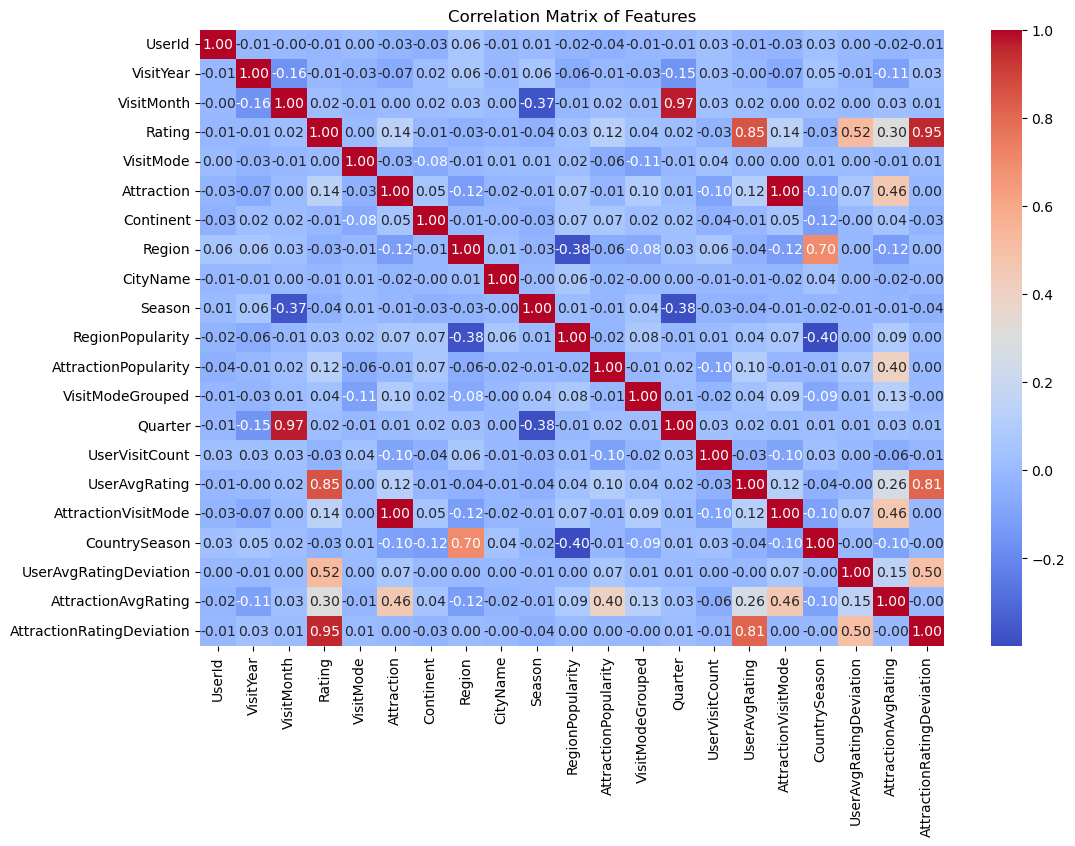

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for correlation calculation
numeric_df = df_model.select_dtypes(include=['int64', 'float64'])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the correlation heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of Features")
plt.show()



In [21]:
import pandas as pd

# Step 1: Load the raw dataset
df = pd.read_csv(r"C:\Tourism\raw_data.csv")

# Step 2: Keep only the selected features
selected_columns = [
    'UserAvgRating',
    'AttractionAvgRating',
    'CountrySeason',
    'Attraction',
    'UserVisitCount',
    'VisitYear',
    'AttractionPopularity',
    'Continent',
    'CityName',
    'Rating'  # remove this line if not needed
]

filtered_df = df[selected_columns]

# Step 3: Save to new CSV file
filtered_df.to_csv("selected_features.csv", index=False)

print("✅ Selected features saved to 'selected_features.csv'")


✅ Selected features saved to 'selected_features.csv'


In [22]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import pickle

# Load your selected raw features dataset including 'Rating'
df = pd.read_csv("selected_features.csv")

# Define target and input feature columns
selected_columns = [
    'UserAvgRating',
    'AttractionAvgRating',
    'CountrySeason',
    'Attraction',
    'UserVisitCount',
    'VisitYear',
    'AttractionPopularity',
    'Continent',
    'CityName',
    'Rating'
]

# Ensure the dataset contains only selected columns
df = df[selected_columns]

# Label Encoding for high-cardinality categorical columns
attraction_encoder = LabelEncoder()
city_encoder = LabelEncoder()
country_season_encoder = LabelEncoder()

df['Attraction'] = attraction_encoder.fit_transform(df['Attraction'])
df['CityName'] = city_encoder.fit_transform(df['CityName'])
df['CountrySeason'] = country_season_encoder.fit_transform(df['CountrySeason'])

# OneHot Encoding for 'Continent'
onehot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_continent = onehot_encoder.fit_transform(df[['Continent']])
encoded_continent_df = pd.DataFrame(
    encoded_continent,
    columns=onehot_encoder.get_feature_names_out(['Continent'])
)

# Drop 'Continent' from original df as it is now encoded
df = df.drop(columns=['Continent']).reset_index(drop=True)

# Combine encoded features with original data
final_encoded_df = pd.concat([
    df.drop(columns=['Rating']).reset_index(drop=True),
    encoded_continent_df.reset_index(drop=True),
    df['Rating'].reset_index(drop=True)
], axis=1)

# Save the fully encoded dataset
final_encoded_df.to_csv("encoded_selected_features_with_rating.csv", index=False)

# Save feature column names (excluding 'Rating') to maintain model input order
final_feature_columns = final_encoded_df.drop(columns=['Rating']).columns.tolist()
with open("final_features.pkl", "wb") as f:
    pickle.dump(final_feature_columns, f)

# Save all encoders in one dictionary
combined_encoder = {
    'onehot': onehot_encoder,
    'label_attraction': attraction_encoder,
    'label_city': city_encoder,
    'label_countryseason': country_season_encoder,
}

with open("combined_encoder.pkl", "wb") as f:
    pickle.dump(combined_encoder, f)

print("✅ Final encoded data saved as 'encoded_selected_features_with_rating.csv'")
print("✅ Feature order saved in 'final_features.pkl'")
print("✅ All encoders saved in 'combined_encoder.pkl'")


✅ Final encoded data saved as 'encoded_selected_features_with_rating.csv'
✅ Feature order saved in 'final_features.pkl'
✅ All encoders saved in 'combined_encoder.pkl'


In [23]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import pickle

# Load the dataset (includes 'Rating' and all selected features)
df = pd.read_csv(r"C:\Tourism\selected_features.csv")

# Ensure correct column order
df = df[[
    'UserAvgRating',
    'AttractionAvgRating',
    'CountrySeason',
    'Attraction',
    'UserVisitCount',
    'VisitYear',
    'AttractionPopularity',
    'Continent',
    'CityName',
    'Rating'
]]

# Define numerical columns to scale (excluding the target 'Rating')
numerical_cols = [
    'UserAvgRating',
    'AttractionAvgRating',
    'UserVisitCount',
    'VisitYear',
    'AttractionPopularity'
]

# Initialize and fit the scaler
scaler = StandardScaler()
scaled_values = scaler.fit_transform(df[numerical_cols])

# Replace original numerical columns with scaled values
df[numerical_cols] = scaled_values

# Save the scaled dataset (Rating column stays unchanged)
df.to_csv("scaled_encoded_features_with_rating.csv", index=False)

# Save the scaler for later use in prediction
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

print("✅ Numerical features scaled and saved to 'scaled_encoded_features_with_rating.csv'")
print("✅ Scaler saved as 'scaler.pkl'")


✅ Numerical features scaled and saved to 'scaled_encoded_features_with_rating.csv'
✅ Scaler saved as 'scaler.pkl'


In [24]:
import pandas as pd
import pickle
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Step 1: Load raw dataset
df_raw = pd.read_csv(r"C:\Tourism\selected_features.csv")

# Step 2: Load saved encoders
with open(r"C:\Tourism\combined_encoder.pkl", "rb") as f:
    combined_encoder = pickle.load(f)

# Step 3: Load saved scaler
with open(r"C:\Tourism\scaler.pkl", "rb") as f:
    scaler = pickle.load(f)

# Define column groups
numerical_cols = [
    'UserAvgRating',
    'AttractionAvgRating',
    'UserVisitCount',
    'VisitYear',
    'AttractionPopularity'
]

label_cols = ['CountrySeason', 'Attraction', 'CityName']
onehot_cols = ['Continent']
target_col = 'Rating'

# Step 4: Apply Label Encoding
df_raw['Attraction'] = combined_encoder['label_attraction'].transform(df_raw['Attraction'])
df_raw['CityName'] = combined_encoder['label_city'].transform(df_raw['CityName'])
df_raw['CountrySeason'] = combined_encoder['label_countryseason'].transform(df_raw['CountrySeason'])

# Step 5: One-hot encode 'Continent'
onehot_encoded = combined_encoder['onehot'].transform(df_raw[onehot_cols])
onehot_encoded_df = pd.DataFrame(onehot_encoded, columns=combined_encoder['onehot'].get_feature_names_out(onehot_cols))

# Step 6: Apply scaling to numerical features
df_raw[numerical_cols] = scaler.transform(df_raw[numerical_cols])

# Step 7: Build the final dataset in correct order
ordered_feature_df = pd.concat([
    df_raw[['UserAvgRating', 'AttractionAvgRating']],                # numerical
    df_raw[['CountrySeason']],                                       # label
    df_raw[['Attraction']],                                          # label
    df_raw[['UserVisitCount', 'VisitYear', 'AttractionPopularity']],# numerical
    onehot_encoded_df.reset_index(drop=True),                        # one-hot
    df_raw[['CityName']]                                             # label
], axis=1)

# Step 8: Prepare target
y = df_raw[target_col]

# Step 9: Train/Test split and model training
X_train, X_test, y_train, y_test = train_test_split(ordered_feature_df, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Optional: Save model if needed
with open("attraction_rating_model.pkl", "wb") as f:
    pickle.dump(model, f)

print("✅ Model trained successfully with proper column order.")
print("✅ Saved as 'attraction_rating_model.pkl'")


✅ Model trained successfully with proper column order.
✅ Saved as 'attraction_rating_model.pkl'


In [25]:
import pickle# Save this after training
with open("final_dummy_columns.pkl", "wb") as f:
    pickle.dump(X_train.columns.tolist(), f)


In [78]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predict on test set
y_pred = model.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("✅ Model Evaluation Metrics:")
print(f"R² Score       : {r2:.4f}")
print(f"MAE (Error)    : {mae:.4f}")
print(f"RMSE (Error)   : {rmse:.4f}")


✅ Model Evaluation Metrics:
R² Score       : 0.6812
MAE (Error)    : 0.2791
RMSE (Error)   : 0.5503


In [68]:
! pip install xgboost


In [79]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from xgboost import XGBRegressor
import numpy as np

# Load the encoded dataset
df = pd.read_csv("encoded_selected_features_with_rating.csv")

# Define correct column order
ordered_columns = [
    'UserAvgRating',
    'AttractionAvgRating',
    'CountrySeason',
    'Attraction',
    'UserVisitCount',
    'VisitYear',
    'AttractionPopularity',
    # Note: One-hot encoded 'Continent' will expand into multiple columns like 'Continent_Europe', etc.
    # So we must dynamically move those just after 'AttractionPopularity'
]

# Extract all one-hot continent columns (they start with 'Continent_')
continent_cols = [col for col in df.columns if col.startswith('Continent_')]

# Insert them after 'AttractionPopularity'
ordered_columns += continent_cols

# Finally add the rest
ordered_columns += ['CityName', 'Rating']

# Reorder the DataFrame
df = df[ordered_columns]

# Separate features and target
X = df.drop("Rating", axis=1)
y = df["Rating"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train XGBoost Regressor
xgb_model = XGBRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Evaluate performance
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Display results
print("📊 XGBoost Regression Performance:")
print(f"✅ R² Score: {r2:.4f}")
print(f"✅ Mean Absolute Error (MAE): {mae:.4f}")
print(f"✅ Mean Squared Error (MSE): {mse:.4f}")
print(f"✅ Root Mean Squared Error (RMSE): {rmse:.4f}")


📊 XGBoost Regression Performance:
✅ R² Score: 0.7283
✅ Mean Absolute Error (MAE): 0.2739
✅ Mean Squared Error (MSE): 0.2581
✅ Root Mean Squared Error (RMSE): 0.5081


In [80]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np

# Define the model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Define a smaller parameter grid to sample from
param_dist = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Setup RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=10,  # number of parameter settings to sample (reduce this to save time/memory)
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=1  # use 1 CPU core to reduce memory footprint
)

# Fit on your training data (X_train, y_train)
random_search.fit(X_train, y_train)

print("Best params:", random_search.best_params_)
print("Best RMSE:", np.sqrt(-random_search.best_score_))


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best params: {'subsample': 1.0, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.05, 'colsample_bytree': 0.8}
Best RMSE: 0.49160496933689435


In [81]:
import pickle

# Suppose your tuned model is stored in variable `best_xgb_model`
with open("Rating_xgb_tuned_model.pkl", "wb") as f:
    pickle.dump(xgb_model, f)
